# <p style="background-color:#1E90FF; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Digital Marketing Conversion Prediction</p>

<img src="image.jpg" width="1800">

<div style="border-radius:10px; padding: 15px; background-color: #8cbed6; font-size:120%; text-align:left">

<h2 align="left"><font color=#4169e1>Problem:</font></h2>

<p style="text-indent: 40px; text-align: justify;">
 The objective of this project is to develop a predictive machine learning model capable of determining whether a customer engaged in a digital marketing campaign will lead to a conversion—such as a purchase, signup, or other desired action. The dataset includes customer demographics, campaign performance metrics (e.g., Ad Spend, Click-Through Rate), and user behavior data (e.g., Website Visits, Time on Site). By accurately predicting conversion likelihood, model empowers marketing teams to allocate budgets more efficiently, target high-potential customers, and ultimately enhance the <b>Return on Investment (ROI)</b> of their digital marketing initiatives.
</p>

<div style="border-radius:10px; padding: 15px; background-color: #8cbed6; font-size:115%; text-align:left">

<h2 align="left"><font color=#4169e1>Objectives:</font></h2>

* __Explore the Dataset__: Uncover patterns, distributions, and relationships within the data (e.g., Age and Income distribution).
* __Conduct Extensive Exploratory Data Analysis (EDA)__: Dive deep into bivariate relationships, specifically analyzing features like AdSpend, CampaignChannel, and WebsiteVisits against the Conversion target.
* __Preprocessing Steps__:
  - Remove irrelevant features (e.g., CustomerID, single-value columns).
  - Address missing values (if any).
  - Treat outliers.
  - Encode categorical variables (e.g., Gender, CampaignChannel, CampaignType).
  - Scale numerical features to standardize their ranges.
  - Address Class Imbalance using techniques like SMOTE-Tomek, as conversions (Class 1) are rare.
* __Model Building__:
  - Establish pipelines for models that require scaling (e.g., Logistic Regression, SVM).
  - Implement and tune powerful classification models including Logistic Regression, SVM, Decision Trees, Random Forest, and XGBoost.
  - Emphasize achieving high Recall for Class 1 (Conversion), ensuring comprehensive identification of all potential high-converting customers.
* __Evaluate and Compare Model Performance__: Utilize Precision, Recall, and F1-score to gauge models' effectiveness, prioritizing a balance between Recall and Precision suitable for optimizing marketing budget.


<a id="import"></a>
# <p style="background-color:#8cbed6; font-family:calibri; color:#4169e1; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>


In [1]:
# Importing the Basic Libraries which will be required 

import pandas as pd
import numpy as np 

# Imoprting the Libraries for Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Importing Libraries for Preprocessing 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek

# Importing Libraries from model Selection 

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Importing Libraries for Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier#, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# Importing Libraries for Model Metrics

from sklearn.metrics import confusion_matrix, accuracy_score#, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report

<a id="read"></a>
# <p style="background-color:#8cbed6; font-family:calibri; color:#4169e1; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>


In [2]:
 #Making the Dataframe of the given data
df = pd.read_csv('digital_marketing_campaign_dataset.csv')
# Viewing the top 10 records of the data 
df.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,IsConfid,ToolConfid,1
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,IsConfid,ToolConfid,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,IsConfid,ToolConfid,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,IsConfid,ToolConfid,1
9,8009,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,IsConfid,ToolConfid,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,8000.0,11999.500000,2309.545410,8000.000000,9999.750000,11999.500000,13999.250000,15999.000000
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000000
AdSpend,8000.0,5000.944830,2838.038153,100.054813,2523.221165,5013.440044,7407.989369,9997.914781
ClickThroughRate,8000.0,0.154829,0.084007,0.010005,0.082635,0.154505,0.228207,0.299968
ConversionRate,8000.0,0.104389,0.054878,0.010018,0.056410,0.104046,0.152077,0.199995
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000000
PagesPerVisit,8000.0,5.549299,2.607358,1.000428,3.302479,5.534257,7.835756,9.999055
TimeOnSite,8000.0,7.727718,4.228218,0.501669,4.068340,7.682956,11.481468,14.995311
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000000


<a id="preprocessing"></a>
# <p style="background-color:#8cbed6; font-family:calibri; color:#4169e1; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Preprocessing Dataset</p>


<div style="border-radius:10px; padding: 15px; background-color: #8cbed6; font-size:120%; text-align:left">

<h2 align="left"><font color=#4169e1>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| **CustomerID** | A unique identifier for each customer/record. |
| **Age** | The age of the customer in years. |
| **Gender** | The gender of the customer (e.g., Male, Female). |
| **Income** | The annual income of the customer. |
| **CampaignChannel** | The channel through which the marketing campaign reached the customer (e.g., Social Media, Email, PPC, Affiliate, Referral). |
| **CampaignType** | The objective of the specific campaign interaction: <br> **Awareness:** To introduce the brand/product. <br> **Conversion:** To drive immediate purchases/actions. <br> **Retention:** To encourage repeat engagement from existing customers. |
| **AdSpend** | The amount of money spent on the advertisement targeting this customer (in currency units). |
| **ClickThroughRate** | The percentage of customers who clicked on the ad after viewing it. |
| **ConversionRate** | The percentage of customers who took the desired action after clicking the ad. **(Note: This feature should be removed during preprocessing to prevent data leakage)**. |
| **WebsiteVisits** | The total number of website visits by the customer. |
| **PagesPerVisit** | The average number of pages viewed by the customer per visit. |
| **TimeOnSite** | The average time (in minutes or seconds) the customer spent on the website. |
| **SocialShares** | The number of times the customer shared the campaign content on social media. |
| **EmailOpens** | The number of times the customer opened an email from the campaign. |
| **EmailClicks** | The number of times the customer clicked a link within a campaign email. |
| **PreviousPurchases** | The number of purchases the customer made prior to this campaign. |
| **LoyaltyPoints** | The current accumulated loyalty points of the customer. |
| **AdvertisingPlatform** | The specific platform used for advertising (e.g., a specific vendor name or identifier). |
| **AdvertisingTool** | The specific tool used to manage the advertising campaign. |
| **Conversion** | **Target Variable:** Binary outcome (0 or 1) indicating whether the customer took the desired action: <br> **0:** No Conversion <br> **1:** Conversion (The desired marketing outcome/purchase). |


In [4]:
# Checking the Shape of the Data to see how many Rows and Columns are present in the dataset

df.shape

(8000, 20)

>  __By seeing the shape of the data we can see that there are a total of 8000 Rows and 20 Columns.__

In [5]:
# Checking the Data types of the columns

df.dtypes

CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object

In [6]:
# Next, we'll examine some descriptive statistics to understand the distribution of the numerical features.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,8000.0,11999.500000,2309.545410,8000.000000,9999.750000,11999.500000,13999.250000,15999.000000
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000000
AdSpend,8000.0,5000.944830,2838.038153,100.054813,2523.221165,5013.440044,7407.989369,9997.914781
ClickThroughRate,8000.0,0.154829,0.084007,0.010005,0.082635,0.154505,0.228207,0.299968
ConversionRate,8000.0,0.104389,0.054878,0.010018,0.056410,0.104046,0.152077,0.199995
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000000
PagesPerVisit,8000.0,5.549299,2.607358,1.000428,3.302479,5.534257,7.835756,9.999055
TimeOnSite,8000.0,7.727718,4.228218,0.501669,4.068340,7.682956,11.481468,14.995311
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000000


# Here are some concise observations based on the descriptive statistics of the dataset:

> a. Age: Mean and median are around 43.6, indicating a symmetric distribution.

> b. Income: Mean is 84,664 dollars with a median of 84,926.50 dollars, showing a balanced income distribution.

> c. Ad Spend: Mean and median are both about 5,000 dollars, suggesting a symmetric distribution.

> d. Click Through Rate (CTR): Mean and median are 0.1548 and 0.1545 respectively, indicating no extreme outliersindicating a symmetric distribution..

> e. Conversion Rate: Mean and median are 0.1044 and 0.104, showing a symmetric distribution.

> f. Website Visits: Mean is 24.75 with a median of 25, indicating symmetry.

> g. Pages Per Visit: Mean and median are both around 5.55, suggesting a balanced distribution.

> h. Time on Site: Mean and median are 7.73 and 7.68 minutes, respectively, indicating symmetry.

> i. Social Shares: Mean is 49.8 with a median of 50, showing a balanced distribution.

> j. Email Opens and Clicks: Both have means and medians close to each other, indicating symmetric distributions.

> k. Previous Purchases: Mean is 4.49 with a median of 4, suggesting balance.

> l. Loyalty Points: Mean and median are both around 2,490, indicating a symmetric distribution.

In [7]:
# Checking for the Null Values in the Dataset

df.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

> __There are no Null Values or NaN Values present in the dataset.__

In [8]:
# Checking for the duplicated Rows in the Dataset

df.duplicated().sum()

np.int64(0)

> __There are also no Duplicated Rows in the Dataset.__

In [9]:
# Checking for the Unique Values in the AdvertisingPlatform Column

df['AdvertisingPlatform'].value_counts()

AdvertisingPlatform
IsConfid    8000
Name: count, dtype: int64

In [10]:
# Checking for the Unique Values in the Advertising Tool Column

df['AdvertisingTool'].value_counts()

AdvertisingTool
ToolConfid    8000
Name: count, dtype: int64

In [11]:
# Removing the Columns That we dont need 

df.drop(['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool'], axis = 1, inplace = True)

> __Dropping the CustomerID From the Dataset as it isn't relevant for the conversion prediction/__

> __Dropping the 'Advertising Platform' and 'Advertising Tool' columns these columns are being removed because they are not relevant for the current analysis, which focuses on numerical features like Ad Spend, Click Through Rate, and Conversion Rate. Additionally, these columns may introduce unnecessary categorical complexity and are not needed for the statistical or machine learning models we plan to use.__

<a id="eda"></a>
# <p style="background-color:#8cbed6; font-family:calibri; color:#4169e1; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | Exploratory Data Analysis</p>

> __Viewing the Distribution of some Key Features.__

<Axes: xlabel='Age', ylabel='Count'>

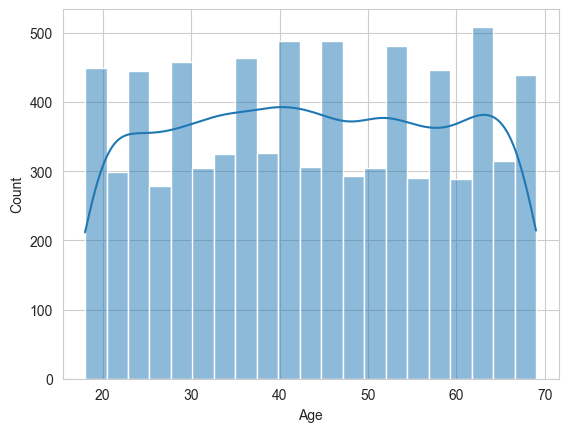

In [12]:
sns.histplot(data = df, x = 'Age', kde = True)

## Plotting the distribution of 'Age' by Conversion Status with KDE
> __This plot illustrates how age varies with conversion status.__

> __The histogram shows the frequency of different ages, while the KDE line provides a smoothed estimate of the age distribution for each conversion status.__


<Axes: xlabel='Income', ylabel='Count'>

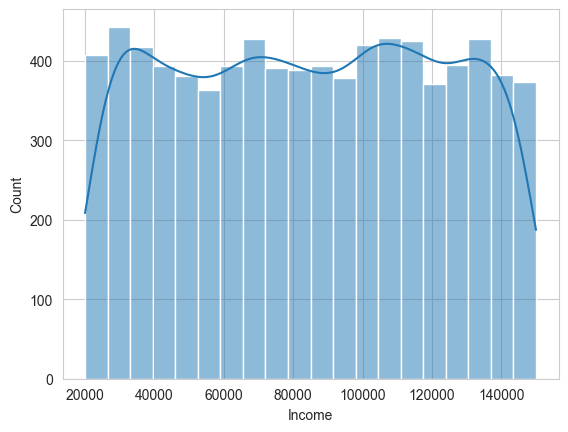

In [13]:
sns.histplot(data = df, x = 'Income', kde = True)

## Plotting the distribution of 'Income' by 'Gender' with KDE
> __This plot visualizes the income distribution for different genders.__

> __The histogram bars show the frequency of income values, while the KDE line smooths out The distribution to make patterns more visible.__

<Axes: xlabel='Count', ylabel='AdSpend'>

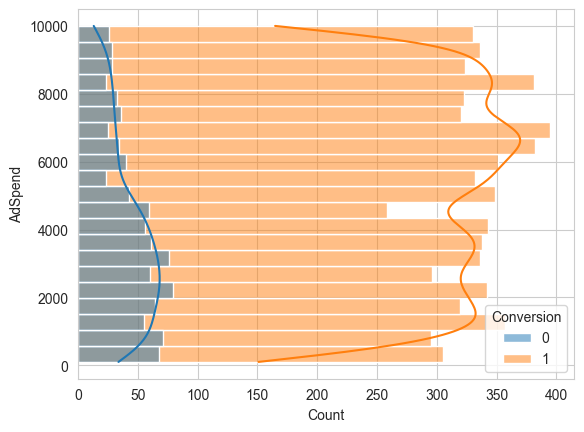

In [14]:
sns.histplot(data = df, y = 'AdSpend', hue = 'Conversion', kde = True)

## Plotting the distribution of 'AdSpend' by 'Conversion' with KDE
> __The histogram bars show the frequency of AdSpend values, while the KDE line smooths out The distribution to make patterns more visible.__

> __This helps to compare AdSpend Values distributions between the Conversion and identify any significant differences or similarities.__

Conversion
1    7012
0     988
Name: count, dtype: int64

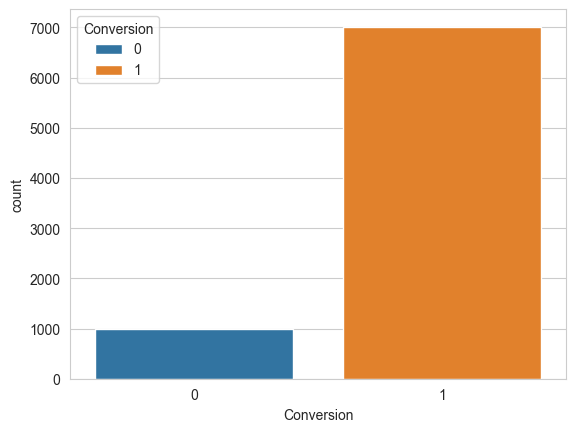

In [15]:
sns.countplot(data = df, x = 'Conversion', hue = 'Conversion')
df['Conversion'].value_counts()

Conversion
1    7012
0     988
Name: count, dtype: int64


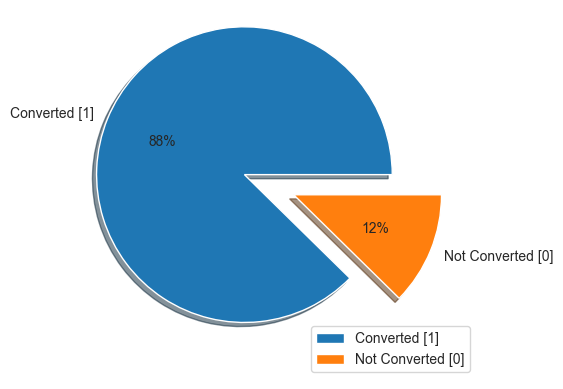

In [16]:
# Viewig by percentage of how the conversion is spread across the data

conversion_Value = df['Conversion'].value_counts()
print(conversion_Value)

plt.pie(conversion_Value, labels=['Converted [1]', 'Not Converted [0]'], explode=[0.35, 0.01], autopct='%.f%%', shadow=True)
plt.legend()
plt.show()

## Plotting the Count of 'Conversion'
> __By Looking at the count of the conversion we can see that the data is highly imbalanced and we have to do either Undersampling or Oversampling.__

CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64

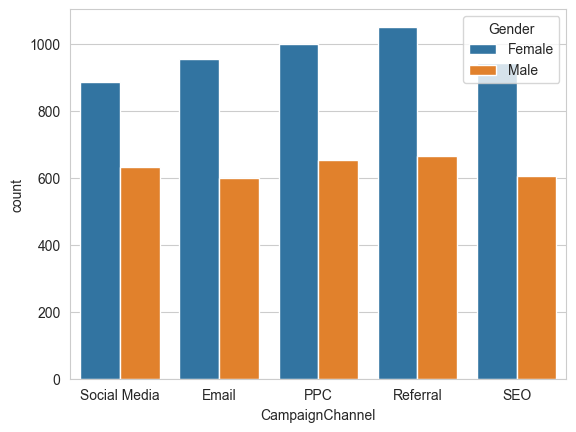

In [17]:
sns.countplot(data = df, x = 'CampaignChannel', hue = 'Gender')
df['CampaignChannel'].value_counts()

> __By Viewing the Plot we can see that which Campaign Channel is used the most and also which genger in interacting the most to the Campaign Channel.__

> __So we can conclude by seeing the plot that the most frequently used Campaign Cannel is the referral and the females are interacting the most thourghout all the Campaign Channels.__

CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

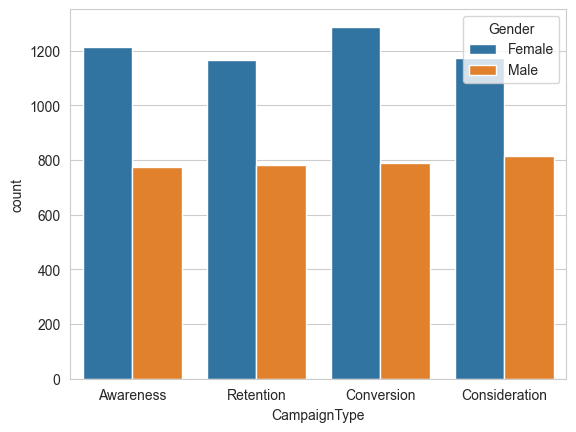

In [18]:
sns.countplot(data = df, x = 'CampaignType', hue = 'Gender')
df['CampaignType'].value_counts()

> __This suggests that the company may prioritize conversion campaigns slightly more than others, while awareness, consideration, and retention campaigns are also common but with minor differences in frequency.__

> __By Seeing the Plots we can see that the females are interacting more compared to males.__

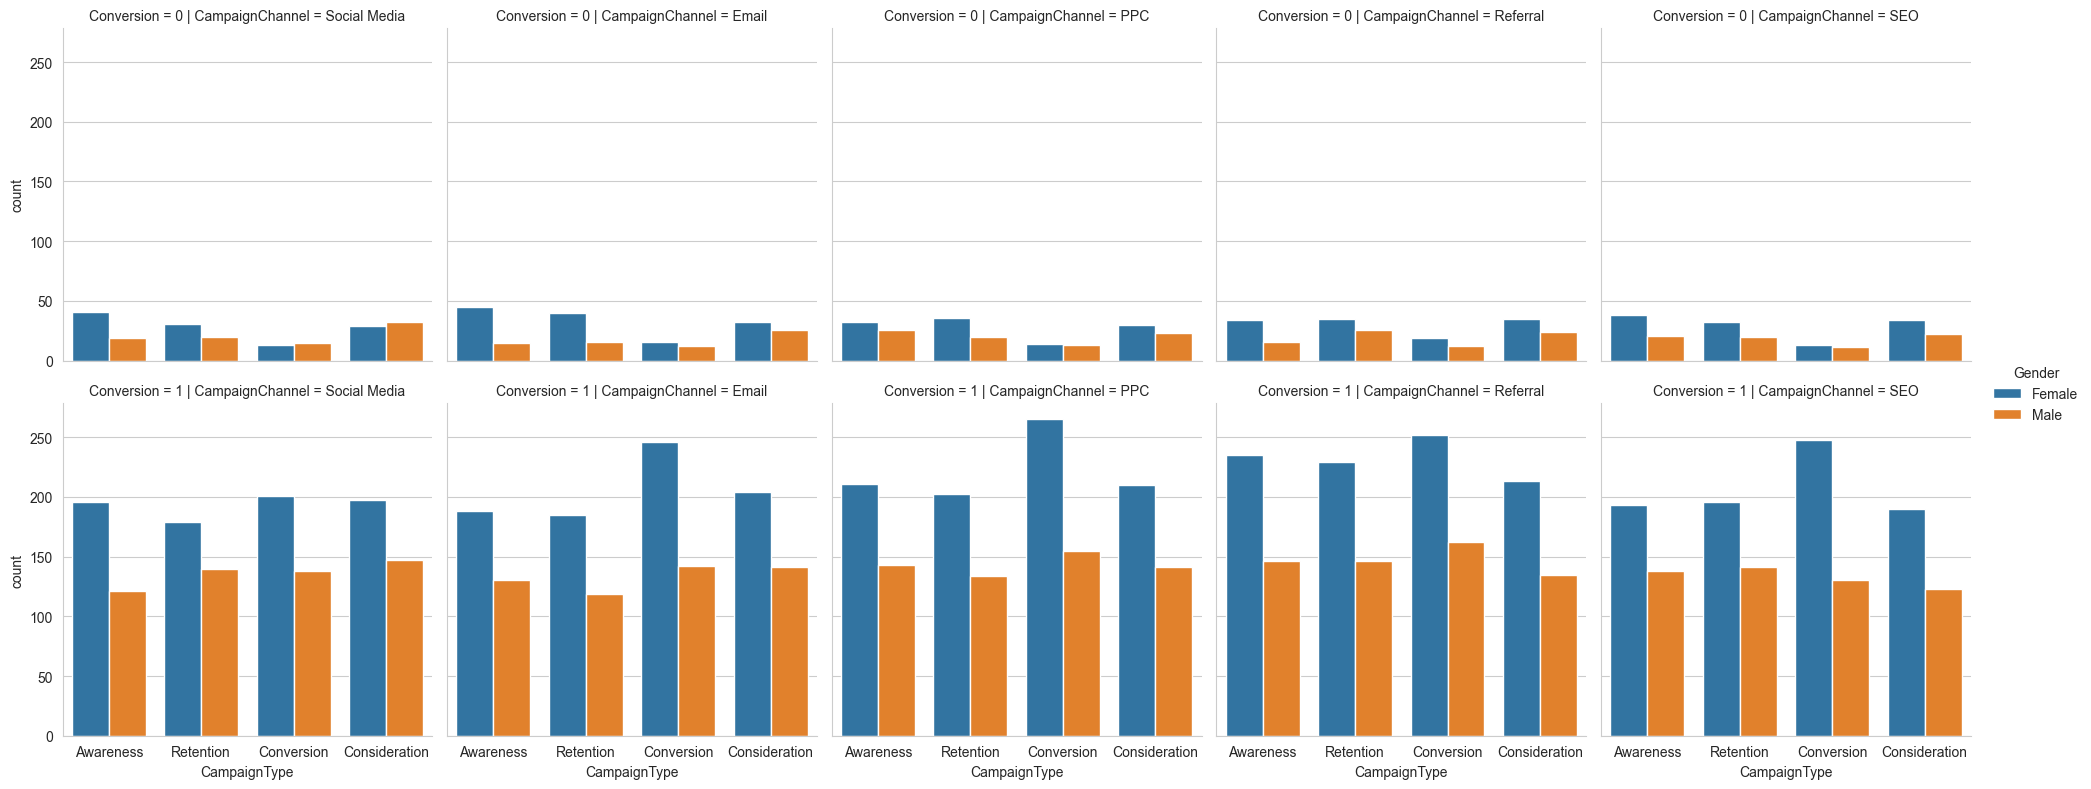

In [19]:
# Creating a Cat Plot of the Campaign Type, Gender, Campaign Channel and the Conversion Data Columns 

g = sns.catplot(
    data=df,
    x = 'CampaignType',
    hue = 'Gender',
    col = 'CampaignChannel',  
    row = 'Conversion',
    kind = 'count',
    height = 4,
    aspect = 1
)

## Creating a multi-faceted categorical plot
> __This plot visualizes the distribution of different 'CampaignType' categories, split by gender.__

> __The plot is further broken down by 'CampaignChannel' and 'Conversion' status.__

## Key Inferences:
## 1. **Campaign Type Preferences by Gender**:
> __- By examining each facet, we can identify which campaign types are more popular among different genders.__

> __- For instance, if a particular campaign type shows higher counts for one gender, it indicates a preference or higher engagement from that gender.__

## 2. **Channel Effectiveness**:
> __- The 'col' parameter splits the data by 'CampaignChannel', allowing us to observe how different channels perform for each campaign type.__

> __- By comparing the counts, we can infer which channels are most effective for different campaign types and genders.__

## 3. **Conversion Rates**:
> __- The 'row' parameter divides the data by 'Conversion' status, highlighting the effectiveness of each campaign type and channel in driving conversions.__

> __- High counts in the 'Conversion = 1' row suggest that certain campaign types and channels are more successful in converting users, potentially revealing gender-specific conversion patterns.__

## 4. **Strategic Insights**:
> __- This plot provides a comprehensive view of how campaign types are distributed across channels and gender, and how they relate to conversion outcomes.__

> __- These insights can be used to tailor future marketing strategies by focusing on the most effective campaign types and channels for each gender.__

In [20]:
# Creating the column list of only
# that will help in Labeling the Graphs while Viewing the Box Plots and other plots

columns_name = df.columns
for index, col_name in enumerate(columns_name):
    print(index, col_name)


0 Age
1 Gender
2 Income
3 CampaignChannel
4 CampaignType
5 AdSpend
6 ClickThroughRate
7 ConversionRate
8 WebsiteVisits
9 PagesPerVisit
10 TimeOnSite
11 SocialShares
12 EmailOpens
13 EmailClicks
14 PreviousPurchases
15 LoyaltyPoints
16 Conversion


In [21]:
# Creating the column list of numeric only 
# that will help in Labeling the Graphs while Viewing the Box Plots and other plots 

numeric_columns_name = df.select_dtypes(include = ['number']).columns
for index, num_col_name in enumerate(numeric_columns_name):
    print(index, num_col_name)

0 Age
1 Income
2 AdSpend
3 ClickThroughRate
4 ConversionRate
5 WebsiteVisits
6 PagesPerVisit
7 TimeOnSite
8 SocialShares
9 EmailOpens
10 EmailClicks
11 PreviousPurchases
12 LoyaltyPoints
13 Conversion


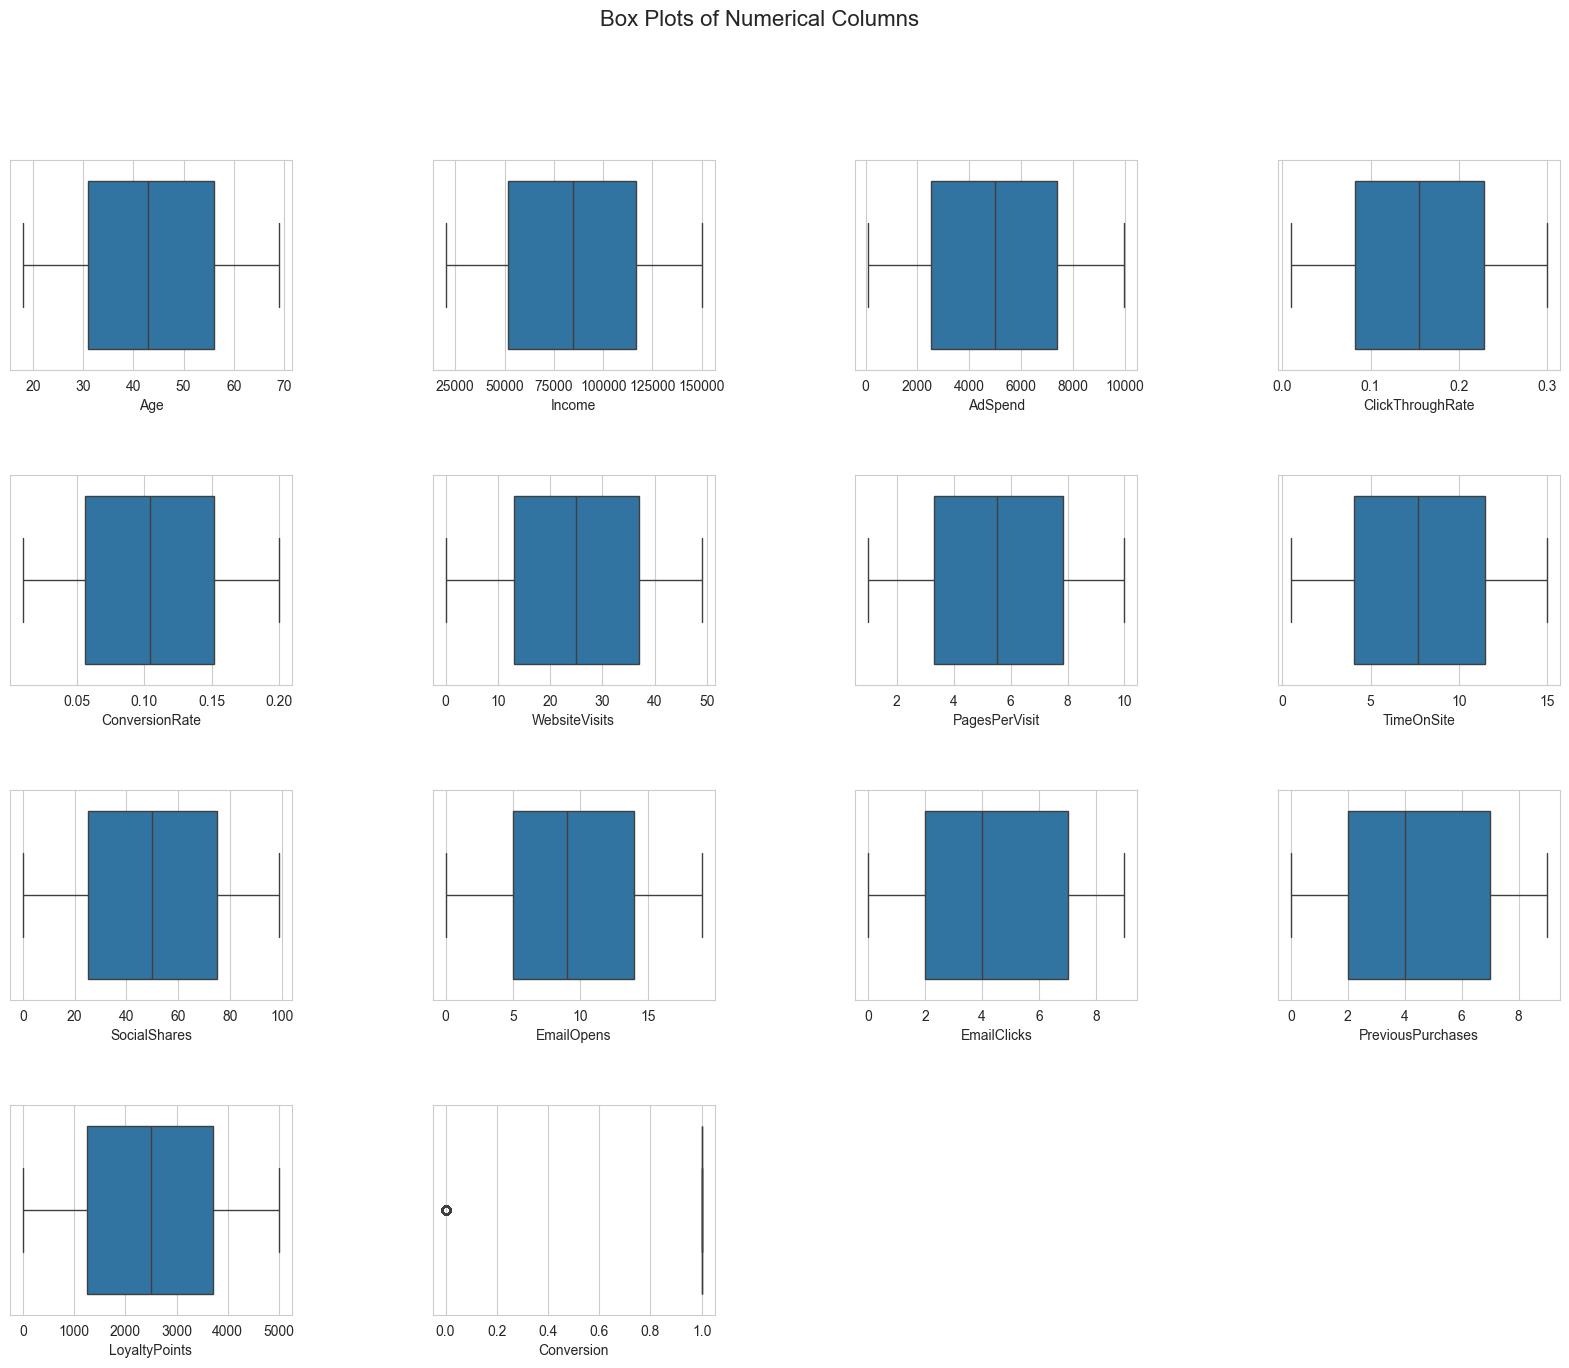

In [22]:
# Determine the number of columns for the subplots grid
n_cols = 4  # Adjust based on how many plots you want in a row
n_rows = (len(numeric_columns_name) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Creating a figure with subplots, arranged in a grid
fig, ax = plt.subplots(n_rows, n_cols, figsize = (20, 15))
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)  # Adjust spacing between plots

# Loop through each numerical column to create individual box plots
for i, col in enumerate(numeric_columns_name):
    row = i // n_cols
    col_pos = i % n_cols
    sns.boxplot(x = col, data = df, ax = ax[row, col_pos])

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(ax.flatten()[j])

# Adding a title to the figure
fig.suptitle('Box Plots of Numerical Columns', fontsize=16)

plt.show()

> __By Viewing the the results of all the boxplots of the Numeric data we can see that there are no Outliers in the Data.__

<Axes: xlabel='Gender', ylabel='Income'>

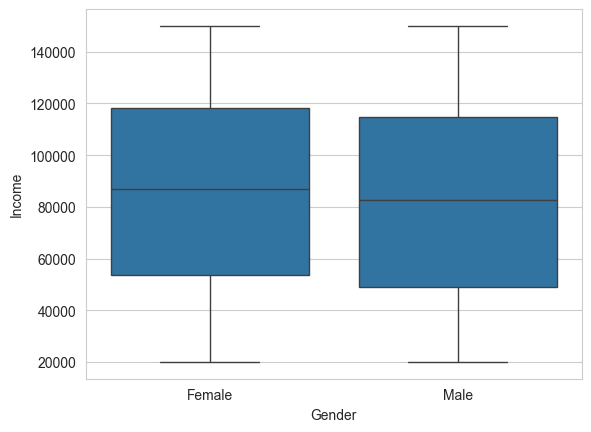

In [23]:
# Viewing the gernder and income as a Boxplot

sns.boxplot(data = df, x = 'Gender', y = 'Income')

<Axes: xlabel='Gender', ylabel='Age'>

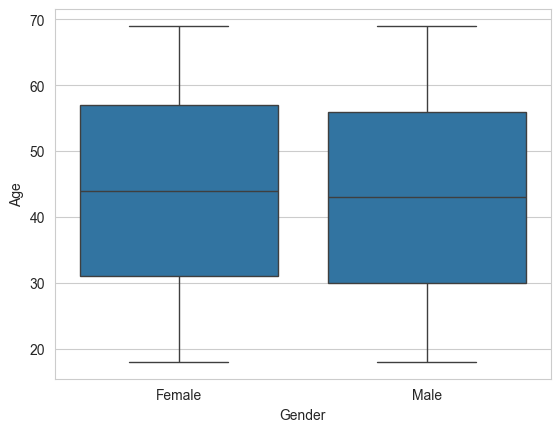

In [24]:
# Viewing the Boxplot of Age and Gender

sns.boxplot(data = df, x = 'Gender', y = 'Age')

> __Just checking further if there are any outlire in the Age and Income as distributed futher by male and female.__

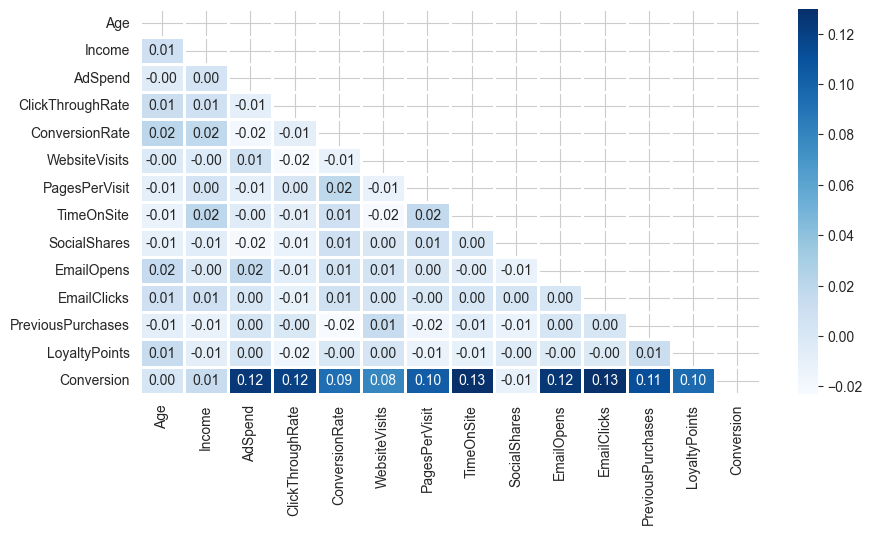

In [25]:
# Calculating the correlation matrix for the DataFrame
#corr = df.corr()
corr = df.select_dtypes(include=['number']).corr()
# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(
    corr, 
    annot = True,           # Annotates each cell with the correlation coefficient
    fmt = '.2f',            # Formats the annotations to 2 decimal places
    linewidths = 0.725,     # Adds a line between cells
    linecolor = 'white',    # Color of the lines between cells
    mask = np.triu(corr),   # Masks the upper triangle of the heatmap to avoid redundancy
    cmap = 'Blues'          # Color map for the heatmap
)
plt.show()


> __- The heatmap shows the correlation coefficients between numerical features in the dataset.__

> __- Positive values indicate a positive correlation, meaning as one feature increases, the other tends to increase as well which will raise the issue of multi collinearity.__

> __- Negative values indicate a negative correlation, meaning as one feature increases, the other tends to decrease.__

> __- A correlation close to 1 or -1 indicates a strong relationship between the features, while a correlation close to 0 indicates a weak relationship.__

> __- The mask is used to hide the upper triangle of the heatmap, as the correlation matrix is symmetric, and this helps to reduce redundancy in the visualization.__

> __- Features with low or near-zero correlations with others indicate independence.__

> __- These features might be good candidates for inclusion in the model as they contribute unique information.__

<a id="modelbuilding"></a>
# <p style="background-color:#8cbed6; font-family:calibri; color:#4169e1; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Model Building</p>

In [26]:
# A function to plot "Confusion Matrix" and "Classification Report"
def plot_result(y_pred) :
    '''
    1) plot Confusion Matrix
    2) plot Classification Report
    
    '''
    fig, ax = plt.subplots(1, 2, figsize = (15, 4))
    fig.tight_layout()
    #AX left - Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ax[0] = sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = '', linewidths = 0.5, ax = ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize = 18)
    ax[0].set_ylabel('Actual labels', fontsize = 18)
    ax[0].set_title('Confusion Matrix', fontsize = 25)
    ax[0].xaxis.set_ticklabels(['0', '1'])
    ax[0].yaxis.set_ticklabels(['0', '1'])
    #
    # AX Right - Classification Report
    cr = pd.DataFrame(classification_report(y_test, y_pred, digits = 3, output_dict = True)).T
    cr.drop(columns = 'support', inplace = True)
    ax[1] = sns.heatmap(cr, cmap = 'Blues', annot = True, fmt = '0.3f', linewidths = 0.5, ax = ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [27]:
df.shape

(8000, 17)

In [28]:
# We will Label Encode the date where ever it is necessary
# As in this case we will label encode the Gender, Campaign Channel, Campaign Type

le = LabelEncoder()    # Making the Object of the LabelEncoder Class

df['Gender'] = le.fit_transform(df['Gender'])    # Label Encoding the Gender Class

df['CampaignChannel'] = le.fit_transform(df['CampaignChannel'])    # Label Encoding the Campaign Channel Class

df['CampaignType'] = le.fit_transform(df['CampaignType'])    # Label Encoding the Campaign Type Class

## Converisons Happened
| __Variable__ | __Description__ |
|     :---      |       :---      | 
| __Gender__ | <br><br> 0: Female <br> 1: Male |
| __CampaignChannel__ | <br><br> 0: Email <br> 1: PPC <br> 2: Referral <br> 3: SEO <br> 4: Social Media |
| __CampaignType__ | <br><br> 0: Awareness <br> 1: Consideration <br> 2: Conversion <br> 3: Retension |

In [29]:
# Just Checking if the values has been label encoded or not 
df['Gender'].value_counts()

Gender
0    4839
1    3161
Name: count, dtype: int64

In [30]:
# Just Checking if the values has been label encoded or not 
df['CampaignChannel'].value_counts()

CampaignChannel
2    1719
1    1655
0    1557
3    1550
4    1519
Name: count, dtype: int64

In [31]:
# Just Checking if the values has been label encoded or not 
df['CampaignType'].value_counts()

CampaignType
2    2077
0    1988
1    1988
3    1947
Name: count, dtype: int64

> __Splitting the Data into X [ independent Variables ] and y [ Dependent Variable ].__

In [32]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

> __Seeing the data we came to the conclusion that we have to bring the data on the same Scale.__

In [33]:
sc = StandardScaler()    # Making the Object of the Standard Scalar Class

X = sc.fit_transform(X)

> __When seen the Conversion Column in the Data Frame we Saw that the converted [1] is more and.__

> __non-converted [0] is less to be precise the split is 88 % to 12 % from which we can conclude that the data is highly Imbalance.__

> __Thus, have decided to go forward with Oversampling, because when performing undersampling the converted [1] data will lose around 6000 datapoints which is not a feasible chooice because it might contain many information that te data could leran and predict from and removing those data will highly impact the Learning of the data .__

> __So we are Going ahead with the combination of Oversampling and Tomek which is SMOTETomek.__

## SMOTE (Synthetic Minority Over-sampling Technique):

> __SMOTE is used to address the problem of imbalanced datasets by generating synthetic samples of the minority class. It works by selecting a minority class instance, finding its nearest neighbors, and then generating new instances along the line segments connecting the minority instance to its neighbors.__

## Tomek Links:

> __Tomek Links is a data cleaning method that identifies and removes pairs of instances from the dataset that are close to each other but belong to different classes. These pairs, known as Tomek links, often reside near the decision boundary, and their removal can help in making the boundary clearer.__

## SMOTETomek :

> __It combines these two approaches to first apply SMOTE to increase the number of minority class samples, and then use Tomek Links to remove noisy or borderline samples. This combination helps in balancing the dataset while also cleaning it, leading to potentially better model performance, especially in classification tasks.__

In [34]:
ost = SMOTETomek()    # Making the object of the SMOTETomek Class

X_osto, y_osto = ost.fit_resample(X, y)

In [35]:
# Checking the Shape of X Columns and y Columns

print(f'Shape of X : {X_osto.shape}')
print(f'Shape of y : {y_osto.shape}')

Shape of X : (14024, 16)
Shape of y : (14024,)


In [36]:
new_y = pd.DataFrame(y_osto)
new_y.head()

,Conversion
0,1
1,1
2,1
3,1
4,1


Conversion
1    7012
0    7012
Name: count, dtype: int64

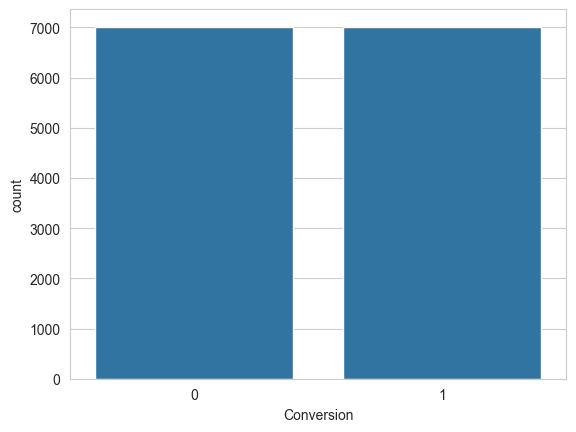

In [37]:
# Just Viewing through Visualization how the data is now Looking.

sns.countplot(data = new_y, x = 'Conversion')
new_y['Conversion'].value_counts()

In [38]:
# Splitting the Data into Train and Test Split

X_train, X_test, y_train, y_test = train_test_split(X_osto, y_osto, test_size = 0.2, random_state = 10, stratify = y_osto)

In [39]:
# Checking the Shapes of the Splits

print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y-test : {y_test.shape}')

Shape of X_train : (11219, 16)
Shape of X_test : (2805, 16)
Shape of y_train : (11219,)
Shape of y-test : (2805,)


<a id="lor"></a>
# <p style="background-color:#8cbed6; font-family:calibri; color:#4169e1; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.1 | Logistic Regression</p>

In [40]:
# Making the Object of the Logistivc Regression Class

lor = LogisticRegression()

lor.fit(X_train, y_train) # Fitting the Model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
# Predicting the model on the test data

y_pred_lor = lor.predict(X_test)

In [42]:
# Viewing the confusion matrix

confusion_matrix(y_test, y_pred_lor)

array([[1093,  309],
       [ 393, 1010]])

In [43]:
# Calculating the Accuracy of the model 

lor_accuracy_score = accuracy_score(y_test, y_pred_lor)
lor_accuracy_score

0.7497326203208556

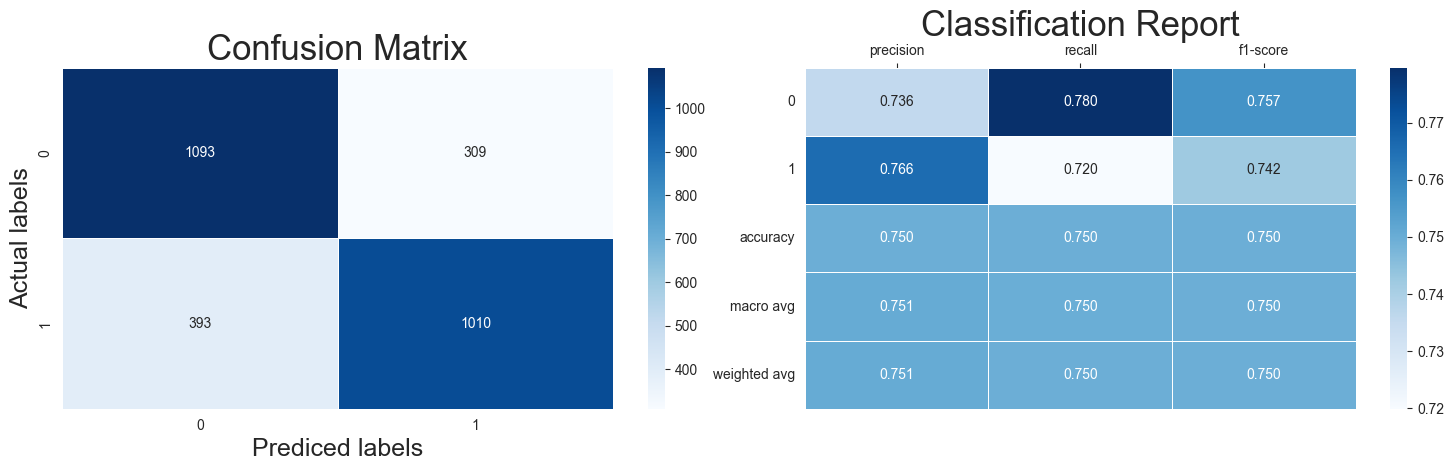

In [44]:
# PLotting the Results 

plot_result(y_pred_lor)

> __We can conclude from the Logistics regression that the model is able to predict accurately around 74% i.e 74% of the times the model is able to predict that is the consumer is getting converted or not.__

<a id="knn"></a>
# <p style="background-color:#8cbed6; font-family:calibri; color:#4169e1; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.2 | KNN (K-Nearest Neighbours)</p>

In [45]:
# Writing a for loop so that we can see whcih value of k ivesthe best accuracy

scores = []                                           # Making the Score list, so that the accuracy scores can be added

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors = k)       # Making the Object of the Class KNeighboursClassifier
    knn.fit(X_train, y_train)                         # Fitting the Model
    y_pred_knn = knn.predict(X_test)                  # Predicting how the model works on the test data
    scores.append(accuracy_score(y_test, y_pred_knn)) # Appending the accuracy scores in the scores list

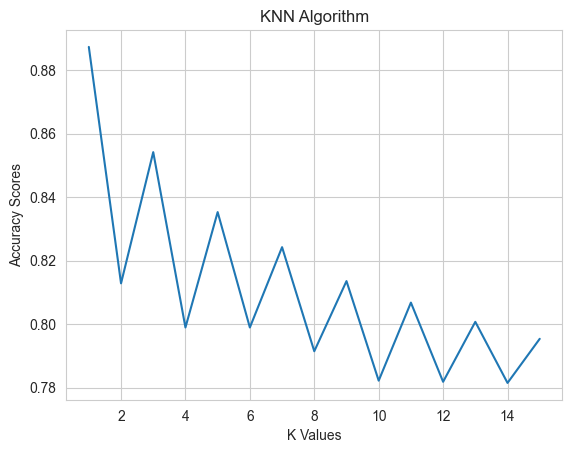

In [46]:
# Making a plot so that we can see which value of k best suits the model

plt.plot(range(1, 16), scores)
plt.xlabel('K Values')
plt.ylabel('Accuracy Scores')
plt.title('KNN Algorithm')
plt.show()

> __By seeing the following graph we are able to see that the KNN is not the best suitable algorithm for the fowllowing dataset as there are many dimension in the data set and with each and every step when the K value i.e the neighbour value is changed then the accuracy keeps on changing and also the accuracy keeps on decreasin or dipping down as we are increasing the value of K.__

<a id="svmhpt"></a>
# <p style="background-color:#8cbed6; font-family:calibri; color:#4169e1; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.3 | SVM Classifier Using RandomizedSearchCV</p>

In [47]:
# Making the Parameter grid that will be used in the SVM Classifier

param = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}

In [48]:
# Making the objects for SVM and the GSCV and fitting the Model

svmgscv = SVC()                              # Making the object for the class SVC

rscv = RandomizedSearchCV(estimator = svmgscv,     # Making the object for the RandomizedSearchCV and adding the Parameters
                    param_distributions = param,
                    n_iter=4,
                    scoring = 'accuracy' ,
                    cv=3,             # 3-fold CV instead of 5
                    verbose=1,
                    n_jobs=-1,        # use all CPU cores
                    random_state=42)    

rscv.fit(X_train, y_train)                   # Fitting the model

Fitting 3 folds for each of 4 candidates, totalling 12 fits


,estimator,SVC()
,param_distributions,"{'kernel': ['linear', 'poly', ...]}"
,n_iter,4
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [49]:
# Getting the Best parameter for the SVM Classifier using the GridSearchCV

rscv.best_params_

{'kernel': 'rbf'}

In [50]:
# Getting the best Model from RandomizedSearchCV

best_svc_rscv = rscv.best_estimator_

In [51]:
# Predicting the Test set results

y_pred_svcrscv = best_svc_rscv.predict(X_test)

In [52]:
# Getting the Confusion Matrix

confusion_matrix(y_test, y_pred_svcrscv)

array([[1221,  181],
       [ 222, 1181]])

In [53]:
# Getting the accuracy


svm_rscv_accuracy_score = round(rscv.best_score_, 4)
svm_rscv_accuracy_score

np.float64(0.8421)

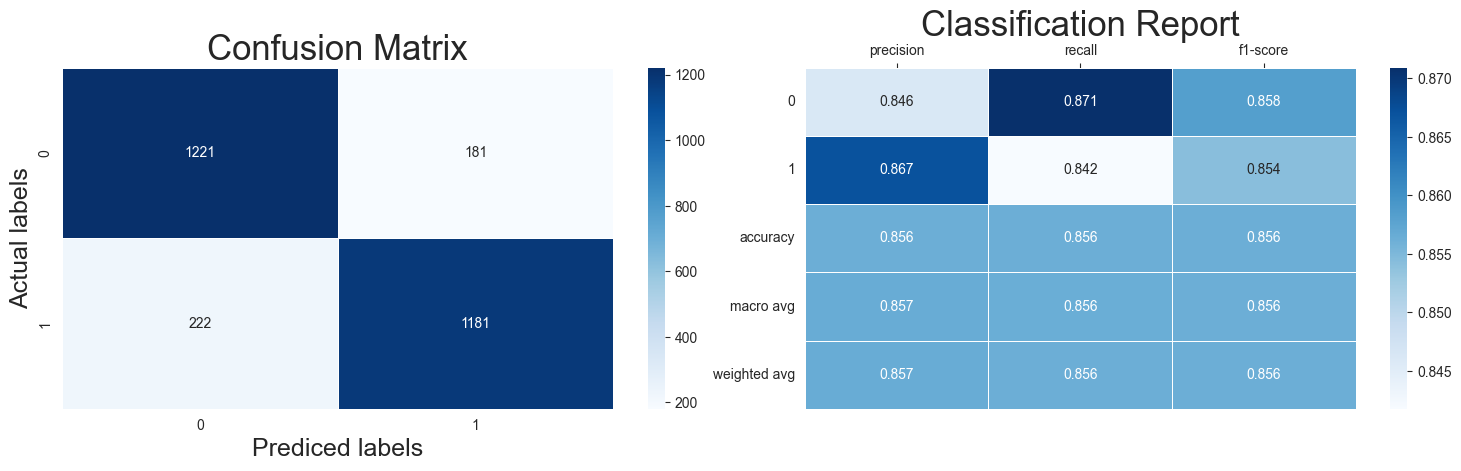

In [54]:
# plotting the Confusion Matrix and Classification Report

plot_result(y_pred_svcrscv)

> __We can conclude that from using RandomaizedSearchCV the model is able to predict accurately around 84% i.e 84% of the times the model is able to predict that is the consumer is getting converted or not and the best parameter when using the SVC is 'rbf'.__


<a id="decisiontree"></a>
# <p style="background-color:#8cbed6; font-family:calibri; color:#4169e1; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.4 | Decision Tree</p>

In [55]:
# We will make the Param grid and will only use GridSearchCV as its the Exhaustive search and will give better
# results rather than using the RandomizedSearchCV

param_dt = {'criterion' : ['gini', 'entropy'],        # Making the Parameter Grid that will be used by the decision tree
            'max_depth' : [10 ,50, 100, 200]}

> __1. We are giving Gini and Entropy as the the Criteria on which the decision three will get build up.__

> __2. Also we are providing with the maximum depth of the tree that it can be built.__ 

In [56]:
# Making the Object of the Class Decision tree and and applying the RandomizedSearchCV  on it

dtc = DecisionTreeClassifier()

gscvdt = RandomizedSearchCV(estimator = dtc,
                      param_distributions  = param_dt,
                      scoring = 'accuracy',
                      n_iter=8,
                      cv=3,               # 3 folds (instead of 5)
                      n_jobs=-1,          # Use all CPU cores
                      verbose=1,
                      random_state=42)

gscvdt.fit(X_train, y_train)      # Fitting the model

Fitting 3 folds for each of 8 candidates, totalling 24 fits


,estimator,DecisionTreeClassifier()
,param_distributions,"{'criterion': ['gini', 'entropy'], 'max_depth': [10, 50, ...]}"
,n_iter,8
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [57]:
# Finding out the best parameters

gscvdt.best_params_

{'max_depth': 100, 'criterion': 'entropy'}

> __Getting the Entropy and maximum depth of the tree as 200 as the Best parameter for the Decision Tree.__

In [58]:
# Getting the best model for decision tree

best_dt_gscv = gscvdt.best_estimator_

In [59]:
# Predicting on the Test Data

y_pred_dtgscv = best_dt_gscv.predict(X_test)

In [60]:
# Getting the Confusion Matrix

confusion_matrix(y_test, y_pred_dtgscv)

array([[1234,  168],
       [ 232, 1171]])

> __The number of FN and FP are now comparatively less than the SVM__

In [61]:
# Getting the Accuracy Score

dt_gscv_accuracy_score = round(accuracy_score(y_test, y_pred_dtgscv), 4)
dt_gscv_accuracy_score

0.8574

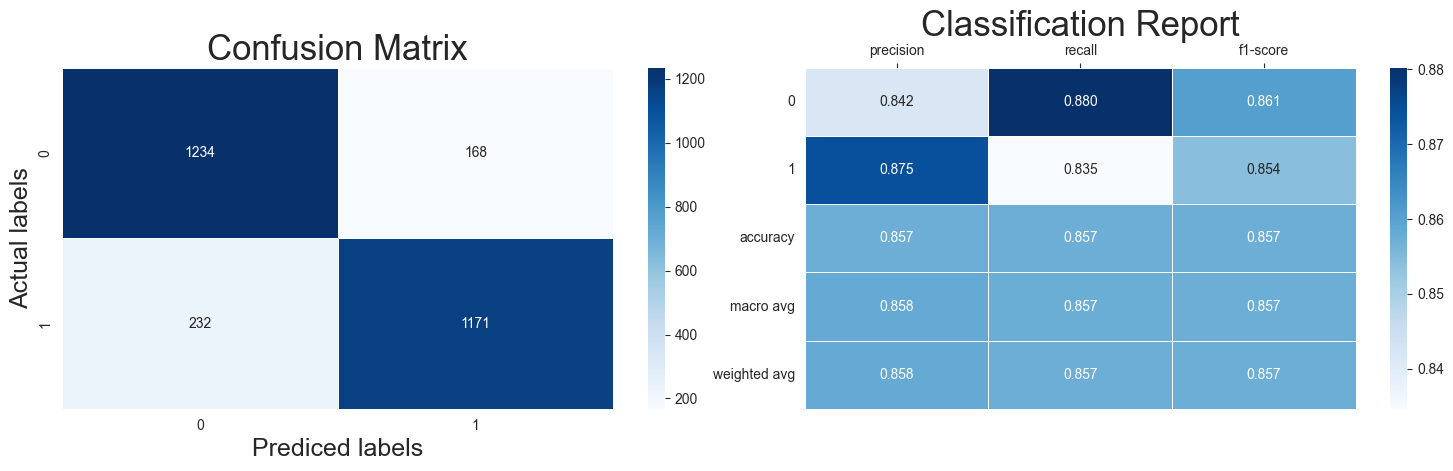

In [62]:
plot_result(y_pred_dtgscv)

> __We can conclude from the observation that criteria as entropy and with max depth of 200 we get the best result for Decision Tree with the accuracy of 87%__

<a id="randomforest"></a>
# <p style="background-color:#8cbed6; font-family:calibri; color:#4169e1; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.5 | Random Forest</p>

In [63]:
# Making the Parameter List for Random Forest which will be passed to teh GridSearchCV 

param_rf = {'criterion' : ['gini', 'entropy'],
            'n_estimators' : [10, 30, 50, 100, 200, 250, 300]
           }

In [64]:
# Making the object of the Random forest setting up the GridSearchCV and fitting the model

rf = RandomForestClassifier()                           # Making the object of the class Random Forest

gscvrf = GridSearchCV(estimator = rf,                   # Making the object of GridSearchCV and Adding the parameters
                      param_grid = param_rf,
                      #n_iter=15,
                      scoring = 'accuracy',
                      cv=3,               # use 3 folds instead of 5
                      verbose=1,
                      n_jobs=-1 )          # use all CPU cores
                      #random_state=42)

gscvrf.fit(X_train, y_train)                            # Fitting the Model

Fitting 3 folds for each of 14 candidates, totalling 42 fits


,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'n_estimators': [10, 30, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,250


In [65]:
# Finding which is the best parameter

gscvrf.best_params_

{'criterion': 'entropy', 'n_estimators': 250}

> __Getting the Entropy and maximum depth of the tree as 200 as the Best parameter for the Random Forest.__

In [66]:
# Getting the best model for Random Forest

best_rf_gscv = gscvrf.best_estimator_

In [67]:
# Predicting on the test data

y_pred_rfgscv = best_rf_gscv.predict(X_test)

In [68]:
# Getting the confusion Matrix

confusion_matrix(y_test, y_pred_rfgscv)

array([[1348,   54],
       [  66, 1337]])

In [69]:
# Getting the accuracy of the Trained Model

rf_gscv_accuracy_score = round(accuracy_score(y_test, y_pred_rfgscv), 4)
rf_gscv_accuracy_score

0.9572

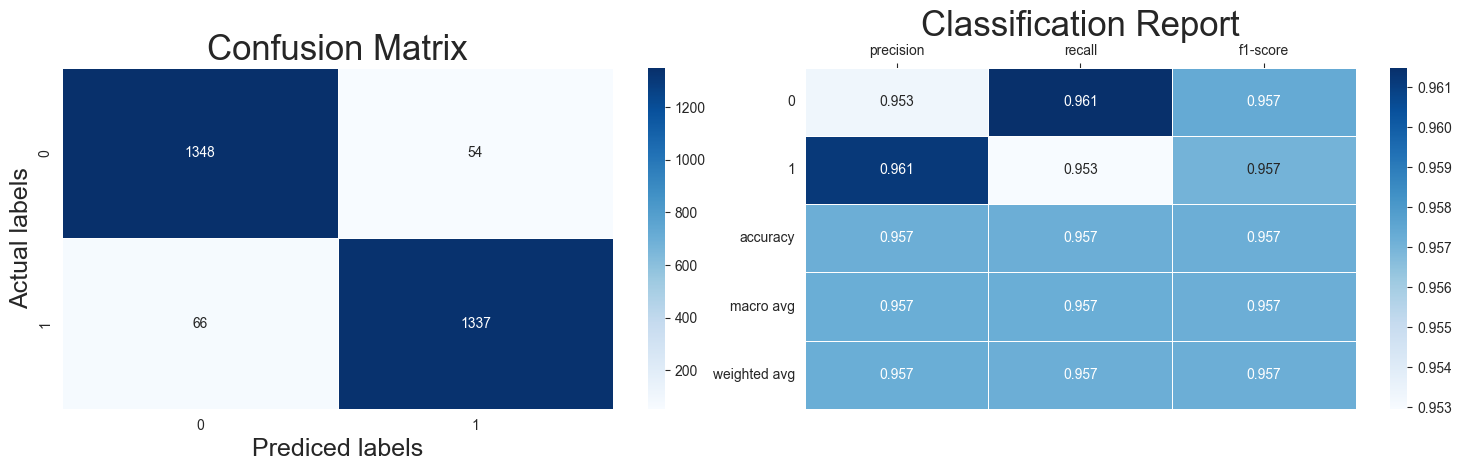

In [70]:
# Plotting the Confusion Matrix and the Classification Report

plot_result(y_pred_rfgscv)

> __We can conclude from the observation that criteria as entropy and with max depth of 200 we get the best result for Random forest with the accuracy of 95%__

<a id="xgboost"></a>
# <p style="background-color:#8cbed6; font-family:calibri; color:#4169e1; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5.6 | XG Boost</p>

In [71]:
# Making the Parameter List for XGBoost Algo

#param_xgb = {'loss' : ['log_loss', 'exponential'],
#             'learning_rate' : [0.001, 0.01, 0.1, 0.2, 0.3, 0.5],
#             'n_estimators' : [10, 50, 100, 200, 300, 350],
#             }
param_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [72]:
#xgb = GradientBoostingClassifier()                  # Making the object of the class
#xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss'
)
gscvxgb = GridSearchCV(estimator = xgb,             # Loading teh parametrs list on to the GrisSearchCV Algo
                       param_grid = param_xgb,
                       scoring = 'accuracy',
                       cv=3,          # Reduce from 5 to 3 folds
                       n_jobs=-1,     # Parallel processing
                       verbose=1)

gscvxgb.fit(X_train, y_train)                       # Fitting the model

Fitting 3 folds for each of 108 candidates, totalling 324 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 4, ...], 'n_estimators': [100, 200, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [73]:
# Finding whcih is the best parameters for the XGBoost algo

gscvxgb.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 1.0}

> __Setting the Learing Rate of 0.1 and the loss function as the log_loss and the number of trees of 350 gets the best model for XGBoost.__

In [74]:
# Getting the best model for XGBoost

best_xgb_gscv = gscvxgb.best_estimator_

In [75]:
# Predicting on the test data

y_pred_xgbgscv = best_xgb_gscv.predict(X_test)

In [76]:
# Plotting the Confusion matrix

confusion_matrix(y_test, y_pred_xgbgscv)

array([[1313,   89],
       [  16, 1387]])

In [77]:
# Getting the accuracy of the model

xgb_gscv_accuracy_score = round(accuracy_score(y_test, y_pred_xgbgscv), 4)
xgb_gscv_accuracy_score

0.9626

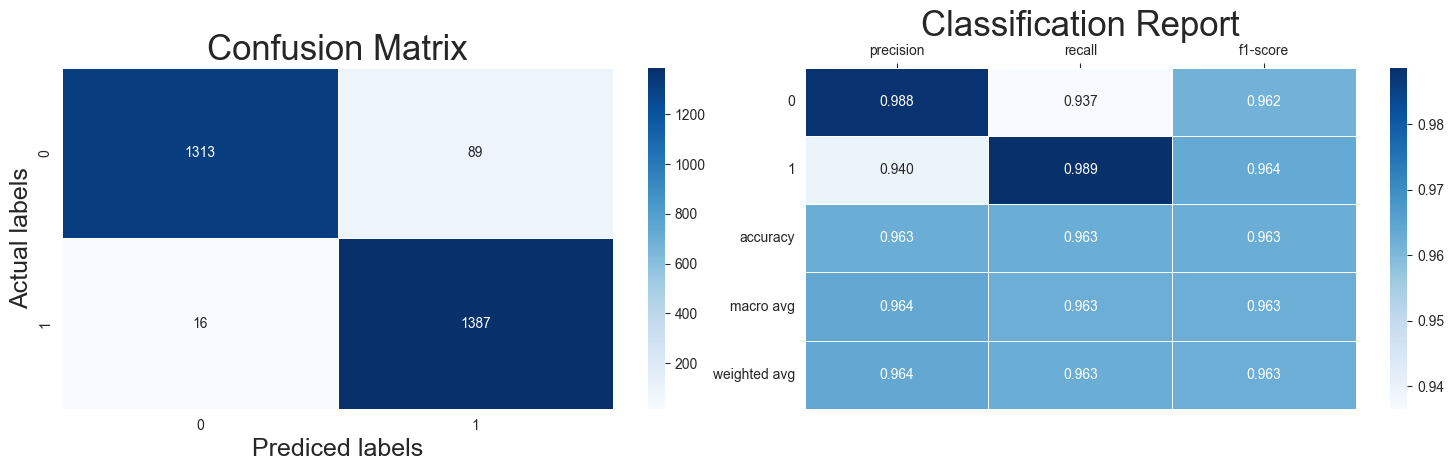

In [78]:
# Plotting the Confusion Matrix and the Classification Report

plot_result(y_pred_xgbgscv)

> __We can conclude from the observation that the lossfuction of log_loss, the no of tress of 350 and with the learning rate of 0.1 gives the best results for XGBoost with the accuracy of 96%__


<a id="finalaccuracychart"></a>
# <p style="background-color:#8cbed6; font-family:calibri; color:#4169e1; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Final Accuracy Chart</p>

In [79]:
# Making the DataFrame of the Final Accuracy Chart so comparing the results would be easy

final_accuracy = pd.DataFrame(
{'Algorithm' : ['Logistic Regression',  'SVM RandomizedSearchCV', 'Decision Tree', 'Random Forest',
               'XGBoost'],
 'Accuracy' : [lor_accuracy_score, svm_rscv_accuracy_score,  dt_gscv_accuracy_score,
               rf_gscv_accuracy_score, xgb_gscv_accuracy_score]}
)

<function matplotlib.pyplot.show(close=None, block=None)>

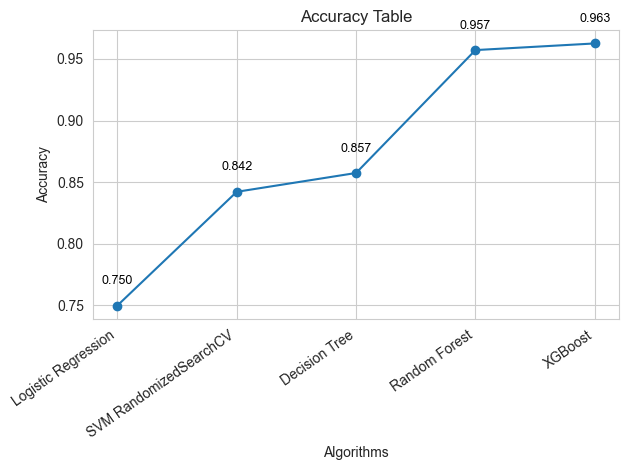

In [80]:
# plotting the results

# Add labels to the marker points
for i, value in enumerate(final_accuracy['Accuracy']):
    plt.text(final_accuracy['Algorithm'][i], value + (0.015),  # Slightly above the marker
             f'{value:.3f}', ha='center', va='bottom', fontsize=9, color='black')

plt.plot(final_accuracy['Algorithm'], final_accuracy['Accuracy'], marker = 'o')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Table')
plt.xticks(rotation = 35, ha = 'right')
plt.tight_layout()
plt.show

> __Making the Plot of the model accuracies so that it will be easy to compare.__

In [81]:
final_accuracy.style.background_gradient()

,Algorithm,Accuracy
0,Logistic Regression,0.749733
1,SVM RandomizedSearchCV,0.842100
2,Decision Tree,0.857400
3,Random Forest,0.957200
4,XGBoost,0.962600


> __Getting the accuracies in the Tabular Format.__

<a id="conclusion"></a>
# <p style="background-color:#8cbed6; font-family:calibri; color:#4169e1; font-size:150%; text-align:center; border-radius:15px 50px;">Conclusion
</p>


> In this project, we implemented and evaluated several machine learning algorithms, including Logistic Regression, Support Vector Machine (SVM), Decision Tree, Random Forest, and XGBoost, to predict the target variable based on the given dataset.

Logistic Regression 
> It provided a simple and interpretable baseline model, offering a quick understanding of the relationships between features and the target variable.

SVM 
> It was effective in handling the high-dimensional feature space, particularly after  RandomizeSearch showed good performance on the dataset.

Decision Tree 
> It offered easy interpretability but was prone to overfitting. However, it helped in understanding the data and visualizing feature importance.

Random Forest 
> It improved upon the Decision Tree by reducing overfitting through ensemble learning, resulting in a more robust model with better generalization to unseen data.

XGBoost 
> It demonstrated strong performance with its gradient boosting framework, particularly excelling in handling complex patterns within the data and offering high accuracy after hyperparameter optimization.

> Overall, the ensemble methods (Random Forest and XGBoost) provided the best performance, with XGBoost and Random Forest slightly outperforming others due to its ability to model complex interactions in the data. This comprehensive approach allowed us to compare different methodologies and select the most effective model for this dataset, with XGBoost and Random Forest being the preferred choice for future predictions.

<a id="conclusion"></a>
# <p style="background-color:#8cbed6; font-family:calibri; color:#4169e1; font-size:150%; text-align:center; border-radius:15px 50px;">Generation of .pkl
</p>

In [82]:
import pickle

# Save the trained XGBoost model to a .pkl file
with open("xgboost_model.pkl", "wb") as file:
    pickle.dump(gscvxgb, file)

print("✅ XGBoost model has been saved successfully as 'xgboost_model.pkl'")

✅ XGBoost model has been saved successfully as 'xgboost_model.pkl'


In [83]:
with open("xgboost_model.pkl", "rb") as f:
    model = pickle.load(f)

print(type(model))

<class 'sklearn.model_selection._search.GridSearchCV'>
